This notebook, by [felipe.alonso@urjc.es](mailto:felipe.alonso@urjc.es)

In this lab exercise, we are going to analyze different regression algorithms to predict [life expectancy](https://www.kaggle.com/kumarajarshi/life-expectancy-who) based on a number of health and economic factors. The algorithms that we are going to analyze are:

- [K-NN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- [Decision trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
- [Multilayer Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html?highlight=mlpregressor#sklearn.neural_network.MLPRegressor)



In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset 

This dataset is comprised of data from all over the world from various countries aggregated by the World Health Organization (WHO). The data is an aggregate of many indicators for a particular country in a particular year. In essence, the data is multiple indicators in a time series separated by country. 

### Variable Descriptions

- `country` (Nominal): the country in which the indicators are from (i.e. United States of America or Congo)
-`year` (Ordinal): the calendar year the indicators are from (ranging from 2000 to 2015)
- `status` (Nominal): whether a country is considered to be 'Developing' or 'Developed' by WHO standards
- `life_expectanc` (Ratio) - the life expectancy of people in years for a particular country and year
- `adult_mortality` (Ratio) - the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; another way to think of this is that the chance an individual will die between 15 and 60 is 26.3%
- `infant_death` (Ratio) - number of infant deaths per 1000 population; similar to above, but for infants
- `alcohol` (Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita
- `percentage_expenditure` (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)
-`hepatitis_b` (Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population
- `measles ` (Ratio) - number of reported Measles cases per 1000 population
- `bmi` (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population
- `under-five_death` (Ratio) - number of people under the age of five deaths per 1000 population
- `polio` (Ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population
- `total_expenditure` (Ratio) - government expenditure on health as a percentage of total government expenditure
- `diphtheria` (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds
- `hiv/aid` (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to HIV/AIDS per 1000 births
- `gdp` (Ratio) - Gross Domestic Product per capita
- `population` (Ratio) - population of a country
- `thinness_1-19_years` (Ratio) - rate of thinness among people aged 10-19 
- `thinness_5-9_years` (Ratio) - rate of thinness among people aged 5-9
- `income_composition_of_resources` (Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- `schooling` (Ratio) - average number of years of schooling of a population

# 0. Load data

In [2]:
import pandas as pd

life_expectancy_df = pd.read_csv('Life Expectancy Data.csv', sep=',', decimal='.')

# do some cleaning to the column's names
def clean_columns(column_name):
    return column_name.strip().lower().replace('  ',' ').replace(' ','_')

life_expectancy_df.columns = [clean_columns(col_name) for col_name in life_expectancy_df.columns]

# rename this column
life_expectancy_df.rename(columns={'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)

# show dataframe
life_expectancy_df.head(-1)    

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,Zimbabwe,2005,Developing,44.6,717.0,28,4.14,8.717409,65.0,420,...,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0


# 1. Exploratory data analysis

- What type of variables do we have?
- Are there any null values? If there are, how to deal with them?
- How variables are distributed? Need any transformation?
- What about generating new variables? 

The objective of the EDA would be to generate the best (curated) dataset for the machine learning algorithms.

In [3]:
# Here some options:
#df.dtypes
#df.info()
#df.describe()

In [4]:
life_expectancy_df.shape

(2938, 22)

In [5]:
life_expectancy_df.dtypes

country                             object
year                                 int64
status                              object
life_expectancy                    float64
adult_mortality                    float64
infant_deaths                        int64
alcohol                            float64
percentage_expenditure             float64
hepatitis_b                        float64
measles                              int64
bmi                                float64
under-five_deaths                    int64
polio                              float64
total_expenditure                  float64
diphtheria                         float64
hiv/aids                           float64
gdp                                float64
population                         float64
thinness_10-19_years               float64
thinness_5-9_years                 float64
income_composition_of_resources    float64
schooling                          float64
dtype: object

In [6]:
life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

### 1.0.a) Presence of null variables in:

In [7]:
for i in range(0,len(life_expectancy_df.isnull().sum())):
    if life_expectancy_df.isnull().sum()[i] == 0:
        continue
    else :
        print(life_expectancy_df.columns[i],life_expectancy_df.isnull().sum()[i])

life_expectancy 10
adult_mortality 10
alcohol 194
hepatitis_b 553
bmi 34
polio 19
total_expenditure 226
diphtheria 19
gdp 448
population 652
thinness_10-19_years 34
thinness_5-9_years 34
income_composition_of_resources 167
schooling 163


In [8]:
life_expectancy_df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


**Your turn**, show data for `country == 'Spain`:

- Do we have consistent values in the database? 

In [9]:
# your code here
life_expectancy_df[life_expectancy_df.country=='Spain']

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
2425,Spain,2015,Developed,82.8,56.0,1,NaN,0.000000,97.0,115,...,97.0,NaN,97.0,0.1,25683.84565,46447697.0,0.6,0.5,0.882,17.7
2426,Spain,2014,Developed,82.6,58.0,1,0.01,42.988476,96.0,154,...,97.0,9.30,97.0,0.1,296.47225,4648882.0,0.6,0.5,0.877,17.6
2427,Spain,2013,Developed,82.4,6.0,1,9.25,423.680459,95.0,131,...,96.0,9.10,96.0,0.1,2921.93420,466245.0,0.6,0.5,0.874,17.5
2428,Spain,2012,Developed,82.0,61.0,1,9.35,4255.781693,96.0,1204,...,97.0,9.39,97.0,0.1,28562.29324,4677355.0,0.6,0.5,0.871,17.2
2429,Spain,2011,Developed,82.1,63.0,1,9.62,4873.818800,97.0,3802,...,97.0,9.48,97.0,0.1,31834.21816,46742697.0,0.6,0.5,0.867,16.9
2430,Spain,2010,Developed,81.9,64.0,1,9.78,578.741717,97.0,302,...,97.0,9.56,97.0,0.1,3736.22800,46576897.0,0.6,0.5,0.860,16.4
2431,Spain,2009,Developed,81.6,66.0,2,9.99,5047.254058,96.0,41,...,96.0,9.52,96.0,0.1,32333.46610,46362946.0,0.6,0.5,0.858,16.3
2432,Spain,2008,Developed,81.3,7.0,2,10.24,5596.535203,97.0,297,...,97.0,8.80,97.0,0.1,35578.73619,4595416.0,0.6,0.5,0.854,16.1
2433,Spain,2007,Developed,89.0,72.0,2,11.05,510.932701,96.0,267,...,96.0,8.36,96.0,0.1,3279.41400,4522683.0,0.6,0.5,0.849,16.0
2434,Spain,2006,Developed,88.0,73.0,2,11.86,4460.390006,97.0,362,...,98.0,8.23,98.0,0.1,28482.69480,44397319.0,0.6,0.5,0.844,15.9


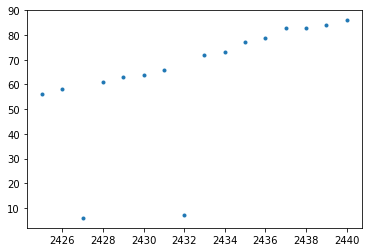

In [10]:
plt.plot(life_expectancy_df[life_expectancy_df.country=='Spain'].adult_mortality,'.')

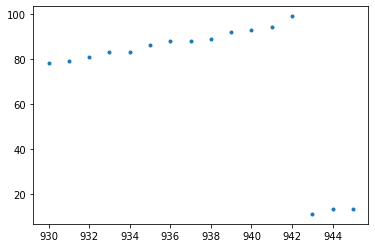

In [11]:
plt.plot(life_expectancy_df[life_expectancy_df.country=='France'].adult_mortality,'.')

### 1.0.b)  Impute replacing with mean

In [12]:
# basic operations: you can do better here
life_expectancy_df = life_expectancy_df.fillna(life_expectancy_df.mean())

In [13]:
for i in range(0,len(life_expectancy_df.isnull().sum())):
    if life_expectancy_df.isnull().sum()[i] == 0:
        continue
    else :
        print(life_expectancy_df.columns[i],life_expectancy_df.isnull().sum()[i])
        
print('No null values')

No null values


### 1.0.c) Status label change

In [14]:
life_expectancy_df['status'] = life_expectancy_df['status'].replace(['Developing', 'Developed'],[0, 1])

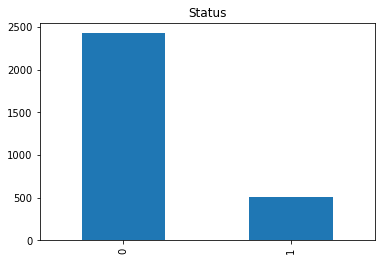

In [15]:
life_expectancy_df['status'].value_counts().plot.bar(title="Status")

## Normalization 

We apply normalization in the tain and test sets derived from the dataframe

### 1.1 Do some plotting

To get insights about how data is distributed and how variables are related:

- Run the following code for different variables
- How would you represent the relationship between `life_expectancy` and `year`?

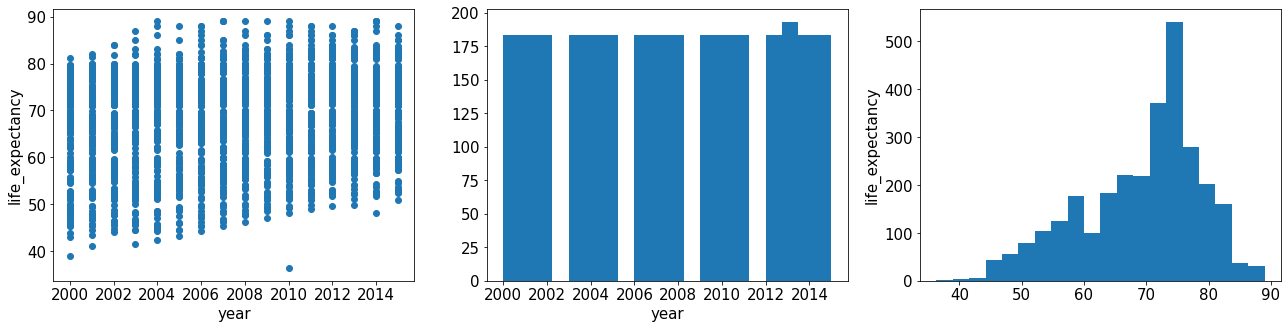

In [16]:
predictor = 'year'

plt.figure(figsize=(22,5))
plt.subplot(1,3,1)
plt.scatter(life_expectancy_df[predictor],life_expectancy_df['life_expectancy'],alpha=1)
plt.xlabel(predictor, size = 15)
plt.ylabel('life_expectancy',  size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.subplot(1,3,2)
plt.hist(life_expectancy_df[predictor],bins=20)
plt.xlabel(predictor, size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.subplot(1,3,3)
plt.hist(life_expectancy_df['life_expectancy'],bins=20)
plt.ylabel('life_expectancy',  size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.show()

## Representation between discrete and continous variable . . .

* Scatter plots with transparency level 
* Boxplots

(array([ 30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 8 Text major ticklabel objects>)

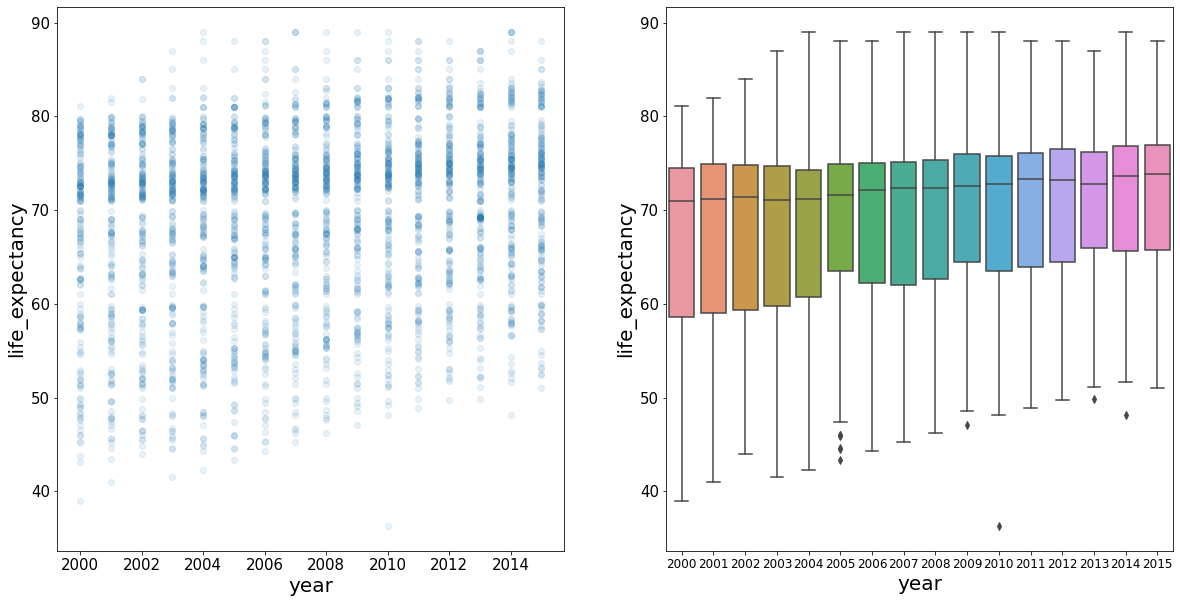

In [17]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.scatter(life_expectancy_df[predictor],life_expectancy_df['life_expectancy'],alpha=0.1)
plt.xlabel(predictor, size = 20)
plt.ylabel('life_expectancy',  size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.subplot(1,2,2)
ax = sns.boxplot(x=life_expectancy_df['year'], y= life_expectancy_df['life_expectancy'])
plt.xlabel(predictor, size = 20)
plt.ylabel('life_expectancy',  size = 20)
plt.xticks(size = 12)
plt.yticks(size = 15)

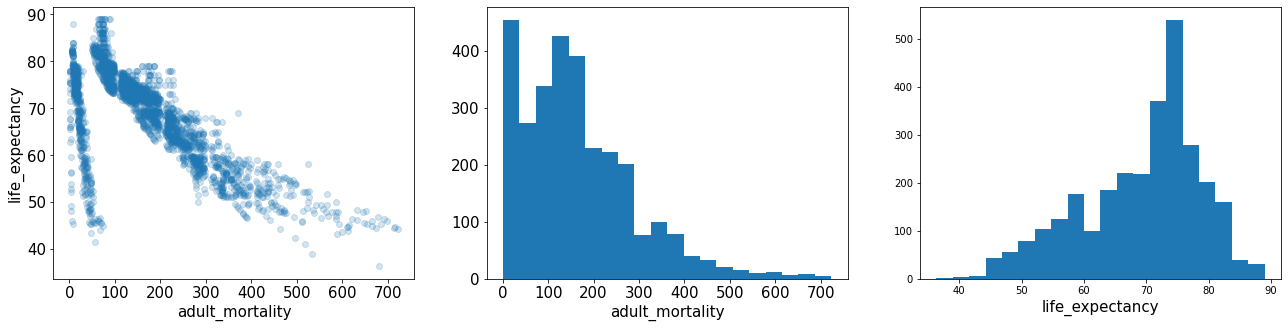

In [18]:
predictor = 'adult_mortality'

plt.figure(figsize=(22,5))
plt.subplot(1,3,1)
plt.scatter(life_expectancy_df[predictor],life_expectancy_df['life_expectancy'],alpha=0.2)
plt.xlabel(predictor, size = 15)
plt.ylabel('life_expectancy',  size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.subplot(1,3,2)
plt.hist(life_expectancy_df[predictor],bins=20)
plt.xlabel(predictor, size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.subplot(1,3,3)
plt.hist(life_expectancy_df['life_expectancy'],bins=20)
plt.xlabel('life_expectancy',  size = 15)

plt.show()

### 1.2 Analyze linear relationship

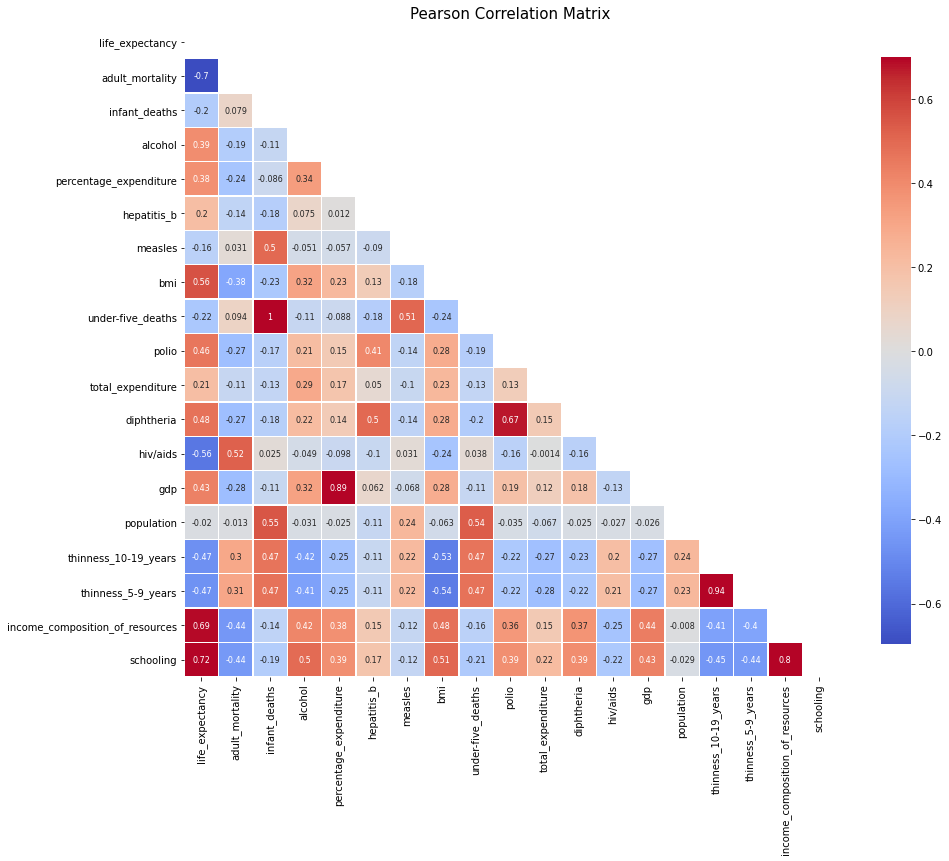

In [19]:
continuous_variables = life_expectancy_df.columns[3:] # It does not count country, year and status

mask = np.zeros_like(life_expectancy_df[continuous_variables].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=15)

sns.heatmap(life_expectancy_df[continuous_variables].corr(),linewidths=0.25,vmax=0.7,square=True,cmap='coolwarm', #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

Drop unnecessary columns (you might want to translate `country` into a numerical variable)

In [20]:
life_expectancy_df = life_expectancy_df.drop(columns = ['infant_deaths'])

In [21]:
life_expectancy_df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [22]:
countries = []
for i in life_expectancy_df['country'].unique():
    countries.append(i)

In [23]:
print(len(countries))

193


In [24]:
print([i for i in range(193)])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192]


### Label for each country

In [25]:
zip_country = zip(countries, [i for i in range(193)])
for i in zip_country:
    print(i[0], ' = ', i[1])

Afghanistan  =  0
Albania  =  1
Algeria  =  2
Angola  =  3
Antigua and Barbuda  =  4
Argentina  =  5
Armenia  =  6
Australia  =  7
Austria  =  8
Azerbaijan  =  9
Bahamas  =  10
Bahrain  =  11
Bangladesh  =  12
Barbados  =  13
Belarus  =  14
Belgium  =  15
Belize  =  16
Benin  =  17
Bhutan  =  18
Bolivia (Plurinational State of)  =  19
Bosnia and Herzegovina  =  20
Botswana  =  21
Brazil  =  22
Brunei Darussalam  =  23
Bulgaria  =  24
Burkina Faso  =  25
Burundi  =  26
Côte d'Ivoire  =  27
Cabo Verde  =  28
Cambodia  =  29
Cameroon  =  30
Canada  =  31
Central African Republic  =  32
Chad  =  33
Chile  =  34
China  =  35
Colombia  =  36
Comoros  =  37
Congo  =  38
Cook Islands  =  39
Costa Rica  =  40
Croatia  =  41
Cuba  =  42
Cyprus  =  43
Czechia  =  44
Democratic People's Republic of Korea  =  45
Democratic Republic of the Congo  =  46
Denmark  =  47
Djibouti  =  48
Dominica  =  49
Dominican Republic  =  50
Ecuador  =  51
Egypt  =  52
El Salvador  =  53
Equatorial Guinea  =  54
Erit

In [26]:
life_expectancy_df['country'] = life_expectancy_df['country'].replace([j for j in countries],[i for i in range(193)])

In [27]:
life_expectancy_df['country'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [28]:
pd.set_option('display.max_columns', None)
life_expectancy_df.head(-1)

,country,year,status,life_expectancy,adult_mortality,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,0,2015,0,65.0,263.0,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,0,59.9,271.0,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,0,59.9,268.0,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,0,59.5,272.0,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,0,59.2,275.0,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,192,2005,0,44.6,717.0,4.14,8.717409,65.0,420,27.5,43,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
2933,192,2004,0,44.3,723.0,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,0,44.5,715.0,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,0,44.8,73.0,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0


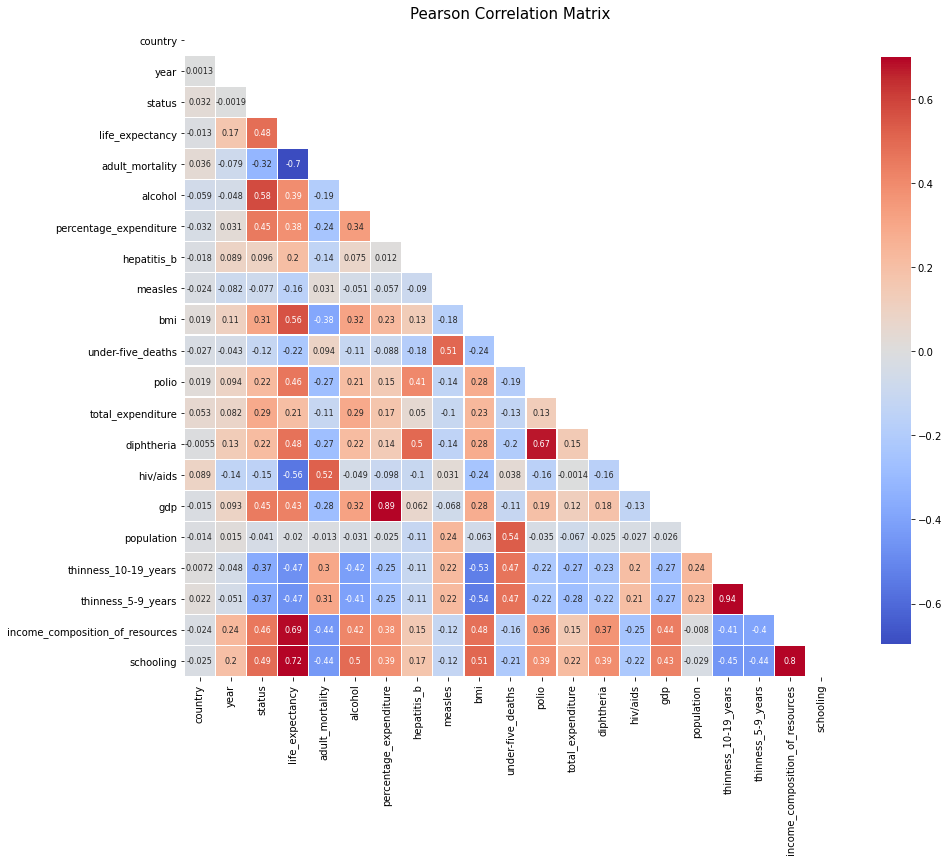

In [29]:
continuous_variables = life_expectancy_df.columns

mask = np.zeros_like(life_expectancy_df[continuous_variables].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=15)

sns.heatmap(life_expectancy_df[continuous_variables].corr(),linewidths=0.25,vmax=0.7,square=True,cmap='coolwarm', #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

In [30]:
life_expectancy_df.shape

(2938, 21)

# 2. Model selection

In this section we will choose the optimal hyperparameters of the regression algorithms. 

In [31]:
# load sklearn libraries

# model selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# ML algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

# Performance metrics
from sklearn.metrics import  mean_squared_error, r2_score
# Others . . .
from sklearn.metrics import max_error, mean_absolute_error

def root_mean_squared_error(y_true, y_pred):
    return np.square(mean_squared_error(y_true, y_pred))

First we need to divide our dataset into target and predictors variables:

In [32]:
# Create X and Y
X = life_expectancy_df.drop(['life_expectancy'], axis = 1)
y = life_expectancy_df['life_expectancy']

print('Predictors: ', X.shape)
print('Target: ', y.shape)

Predictors:  (2938, 20)
Target:  (2938,)


Now, next steps are:

1. Train-test selection: how would you choose the train and test sets? randomly by samples or randomly by `country`?

2. Data normalization: do you need to scale your data? Why?

3. Hyper-paramenters search and selection

In [33]:
# Examples 
Afghanistan_rows = life_expectancy_df.country.value_counts()[0]
print(Afghanistan_rows)

France_rows = life_expectancy_df.country.value_counts()[60]
print(France_rows)  

16
16


1.b) We do not split x_train and x_test by each country due to the low number of data that it would contain from them. So, we apply the corresponding algorithm by the samples instead.

In [34]:
# 1. Train test-set
# your code here
X_train, X_test, Y_train,  Y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [35]:
# 2. Data normalization
# your code here
scaler = StandardScaler().fit(X_train)
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [36]:
print(X_train_normalized.shape)
print([i for i in X.columns])

(2056, 20)
['country', 'year', 'status', 'adult_mortality', 'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_10-19_years', 'thinness_5-9_years', 'income_composition_of_resources', 'schooling']


# 3. Hyper-parameters search

## Decision trees

{'max_depth': 8}

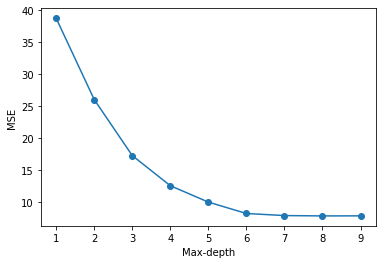

In [37]:
max_depth = range(1,10)
#min_samples_leaf = [1,5,10,15,50,100]

param_grid = {
    'max_depth': max_depth,
    #'min_samples_leaf': min_samples_leaf
}

grid = GridSearchCV(
    DecisionTreeRegressor(random_state = 0),
    param_grid = param_grid,
    cv = 4,
    scoring = 'neg_mean_squared_error'
    )
grid.fit(X_train_normalized, Y_train)
#grid.best_score_ * -1

scores = grid.cv_results_['mean_test_score']
plt.plot(max_depth, scores*-1, '-o')
plt.xlabel('Max-depth')
plt.ylabel('MSE')

grid.best_params_

{'min_samples_leaf': 5}

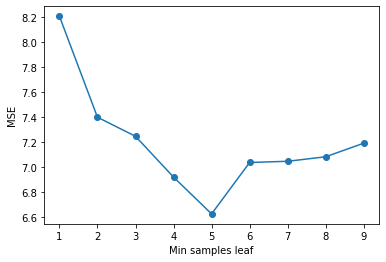

In [38]:
#max_depth = range(1,10)
min_samples_leaf = range(1,10)

param_grid = {
    #'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf
}

grid = GridSearchCV(
    DecisionTreeRegressor(random_state = 0),
    param_grid = param_grid,
    cv = 4,
    scoring = 'neg_mean_squared_error'
    )
grid.fit(X_train_normalized, Y_train)
#grid.best_score_ * -1

scores = grid.cv_results_['mean_test_score']
plt.plot(min_samples_leaf, scores*-1, '-o')
plt.xlabel('Min samples leaf')
plt.ylabel('MSE')

grid.best_params_

## K-NN

K value =  1 RMSE =  0.0
K value =  3 RMSE =  14.816741954827396
K value =  5 RMSE =  31.893593277774347
K value =  7 RMSE =  45.88777394076914
K value =  9 RMSE =  60.16353338646903
K value =  11 RMSE =  76.7267776899998
K value =  13 RMSE =  90.98818800598046
K value =  15 RMSE =  100.01293674547173
K value =  17 RMSE =  110.75072284928193
K value =  19 RMSE =  118.42414757022938
K value =  21 RMSE =  127.46122999083266
K value =  23 RMSE =  135.74696095319828
K value =  25 RMSE =  142.06802545425452
K value =  27 RMSE =  149.86487360020683
K value =  29 RMSE =  156.56247032863945


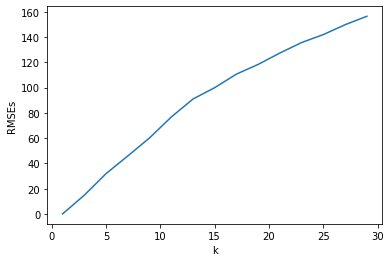

The best k value is =  1


In [39]:
k_values = range(1,31,2)
k_rmse = []
for k in k_values:
    kNN=KNeighborsRegressor(n_neighbors=k , weights = 'uniform')
    kNN.fit(X_train_normalized, Y_train)  
    pred = kNN.predict(X_train_normalized)
    rmse = root_mean_squared_error(Y_train, pred)

    print('K value = ', k,'RMSE = ',rmse)
    k_rmse.append(rmse)
    
plt.plot(k_values, k_rmse)
plt.xlabel('k')
plt.ylabel('RMSEs')
plt.show()

# Select the maximum because we are considering accuracuy
print('The best k value is = ',np.array(k_values)[k_rmse.index(np.array(k_rmse).min())])

Weights function  =  uniform RMSE =  31.893593277774347
Weights function  =  distance RMSE =  0.0


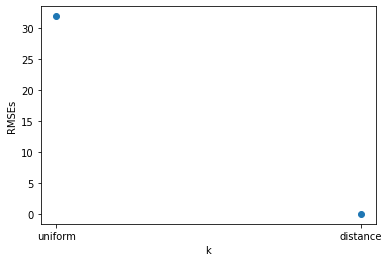

The best weight function is =  distance


In [42]:
weights = ['uniform', 'distance']
k_rmse = []
for k in weights:
    kNN=KNeighborsRegressor(n_neighbors = 5 , weights = k)
    kNN.fit(X_train_normalized, Y_train)  
    pred = kNN.predict(X_train_normalized)
    rmse = root_mean_squared_error(Y_train, pred)

    print('Weights function  = ', k,'RMSE = ',rmse)
    k_rmse.append(rmse)
    
plt.scatter(weights, k_rmse)
plt.xlabel('k')
plt.ylabel('RMSEs')
plt.show()

# Select the maximum because we are considering accuracuy
print('The best weight function is = ',np.array(weights)[k_rmse.index(np.array(k_rmse).min())])

Distance metric  =  euclidean RMSE =  31.893593277774347
Distance metric  =  manhattan RMSE =  10.680187402313974
Distance metric  =  chebyshev RMSE =  104.68439526491908
Distance metric  =  minkowski RMSE =  31.893593277774347


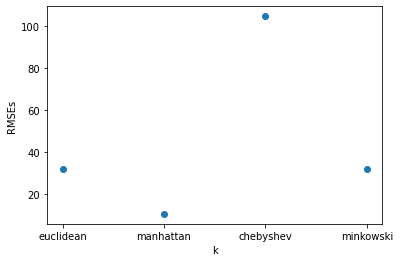

The best distance metric is =  distance


In [47]:
distance_metric = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
k_rmse = []
for k in distance_metric:
    kNN=KNeighborsRegressor(n_neighbors = 5 , weights = 'uniform', metric = k)
    kNN.fit(X_train_normalized, Y_train)  
    pred = kNN.predict(X_train_normalized)
    rmse = root_mean_squared_error(Y_train, pred)

    print('Distance metric  = ', k,'RMSE = ',rmse)
    k_rmse.append(rmse)
    
plt.scatter(distance_metric, k_rmse)
plt.xlabel('k')
plt.ylabel('RMSEs')
plt.show()

# Select the maximum because we are considering accuracuy
print('The best distance metric is = ',np.array(weights)[k_rmse.index(np.array(k_rmse).min())])

Distance metric  =  euclidean RMSE =  0.0
Distance metric  =  manhattan RMSE =  0.0
Distance metric  =  chebyshev RMSE =  0.0
Distance metric  =  minkowski RMSE =  0.0


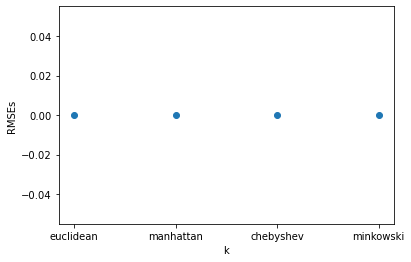

The best distance metric is =  uniform


In [48]:
distance_metric = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
k_rmse = []
for k in distance_metric:
    kNN=KNeighborsRegressor(n_neighbors = 5 , weights = 'distance', metric = k)
    kNN.fit(X_train_normalized, Y_train)  
    pred = kNN.predict(X_train_normalized)
    rmse = root_mean_squared_error(Y_train, pred)

    print('Distance metric  = ', k,'RMSE = ',rmse)
    k_rmse.append(rmse)
    
plt.scatter(distance_metric, k_rmse)
plt.xlabel('k')
plt.ylabel('RMSEs')
plt.show()

# Select the maximum because we are considering accuracuy
print('The best distance metric is = ',np.array(weights)[k_rmse.index(np.array(k_rmse).min())])

# 4. Model assessment 

Once the hyperparameters of the model have been selected, measure the performance of the different algorithms

## <span style="color:darkcyan">4.1a) Optimal hyper-parameters for *Decision Trees algorithm*</span>

### <span style="color:lightsteelblue">a) Finding out the optimal parameters:</span>

In [41]:
#Decision Trees
tree = DecisionTreeRegressor(random_state = 0, max_depth=8, min_samples_leaf = 5).fit(X_train_normalized, Y_train)
print('R2 square of train = ',tree.score(X_train_normalized, Y_train))
print('R2 square of test = ',tree.score(X_test_normalized, Y_test)) 
print('Some kind of over-fitting between both; min samples = 5 and depth 8')
#Similar values tell us no over-fitting
#No similar = over-fitting

Y_pred = tree.predict(X_test_normalized)
print('MSE =',mean_squared_error(Y_test,Y_pred))
print('')

tree = DecisionTreeRegressor(random_state = 0, max_depth=6 ,min_samples_leaf = 4).fit(X_train_normalized, Y_train)
print('R2 square of train = ',tree.score(X_train_normalized, Y_train))
print('R2 square of test = ',tree.score(X_test_normalized, Y_test)) 
print('Some kind of over-fitting between both but less; min samples = 4 and depth 6')
#Similar values tell us no over-fitting
#No similar = over-fitting

Y_pred = tree.predict(X_test_normalized)
print('MSE =',mean_squared_error(Y_test,Y_pred))
print('')

tree = DecisionTreeRegressor(random_state = 0, max_depth=6 ,min_samples_leaf = 10).fit(X_train_normalized, Y_train)
print('R2 square of train = ',tree.score(X_train_normalized, Y_train))
print('R2 square of test = ',tree.score(X_test_normalized, Y_test)) 
print('Some kind of over-fitting between both but less; min samples = 10 and depth 6')
#Similar values tell us no over-fitting
#No similar = over-fitting

Y_pred = tree.predict(X_test_normalized)
print('MSE =',mean_squared_error(Y_test,Y_pred))
print('')

R2 square of train =  0.9674561010438811
R2 square of test =  0.9212856111117357
Some kind of over-fitting between both; min samples = 5 and depth 8
MSE = 7.023853692583779

R2 square of train =  0.9435765567480785
R2 square of test =  0.9111058419427298
Some kind of over-fitting between both but less; min samples = 4 and depth 6
MSE = 7.932216322050023

R2 square of train =  0.9407137927572228
R2 square of test =  0.9112935726105833
Some kind of over-fitting between both but less; min samples = 10 and depth 6
MSE = 7.915464712042782



### <span style="color:lightsteelblue">b) Conclusion:</span>

In [42]:
print('Best hyper parameters of tree regressor are  ')
print('max_depth = 6 and min_samples_leaf = 10')

Best hyper parameters of tree regressor are  
max_depth = 6 and min_samples_leaf = 10


### <span style="color:lightsteelblue">c) Extra: Evaluating features relevance</span>

country     0.0013288845430730958
year     0.0003190339991746593
status     0.0
adult_mortality     0.19844510766277185
alcohol     0.003976330118201646
percentage_expenditure     0.0
hepatitis_b     0.0
measles     0.000519631699669867
bmi     0.0011798398407556697
under-five_deaths     0.035767612677900434
polio     0.00044678957698046835
total_expenditure     5.6789282230855204e-05
diphtheria     0.0014649450506055328
hiv/aids     0.6332975282965815
gdp     0.0009145045069170011
population     0.0015472501252889368
thinness_10-19_years     0.002075079456672855
thinness_5-9_years     0.010647242058580855
income_composition_of_resources     0.08586560093145813
schooling     0.022147830173136616


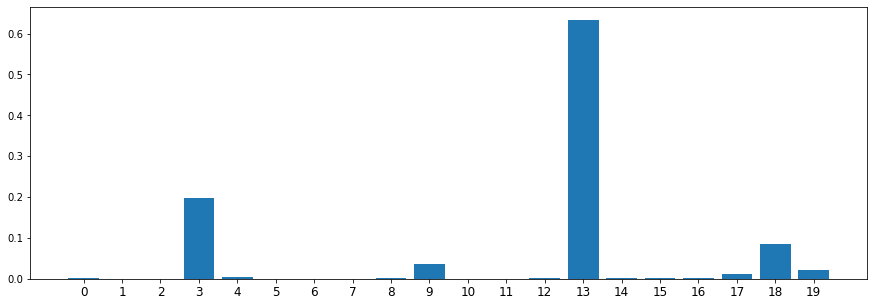

In [43]:
# Extra
from matplotlib import pyplot
importance=tree.feature_importances_
for i in range(0,len(importance)):
    print(X.columns[i],'   ', importance[i])
plt.figure(figsize = (15,5))
x = range(len(importance))
pyplot.bar(x, importance)
plt.xticks(x,size = 12)
pyplot.show()

## <span style="color:darkcyan">4.1b) Optimal hyper-parameters for *K-NN algorithm*</span>

### <span style="color:lightsteelblue">a) Finding out the optimal parameters:</span>

In [44]:
kNN = KNeighborsRegressor(n_neighbors = 1 , weights = 'distance').fit(X_train_normalized, Y_train)
print('R2 square of train = ',kNN.score(X_train_normalized, Y_train))
print('R2 square of test = ',kNN.score(X_test_normalized, Y_test)) 
print('Some kind of over-fitting between both; n_ngh = 1 and weights from distance formula')
#Similar values tell us no over-fitting
#No similar = over-fitting

Y_pred = kNN.predict(X_test_normalized)
print('MSE =',mean_squared_error(Y_test,Y_pred))
print('')

kNN = KNeighborsRegressor(n_neighbors = 5 , weights = 'distance').fit(X_train_normalized, Y_train)
print('R2 square of train = ',kNN.score(X_train_normalized, Y_train))
print('R2 square of test = ',kNN.score(X_test_normalized, Y_test)) 
print('Some kind of over-fitting between both; n_ngh = 5 and weights from distance formula')
#Similar values tell us no over-fitting
#No similar = over-fitting

Y_pred = kNN.predict(X_test_normalized)
print('MSE =',mean_squared_error(Y_test,Y_pred))
print('')

kNN = KNeighborsRegressor(n_neighbors = 1 , weights = 'uniform').fit(X_train_normalized, Y_train)
print('R2 square of train = ',kNN.score(X_train_normalized, Y_train))
print('R2 square of test = ',kNN.score(X_test_normalized, Y_test)) 
print('Some kind of over-fitting between both; n_ngh = 1 and weights from uniform formula')
#Similar values tell us no over-fitting
#No similar = over-fitting

Y_pred = kNN.predict(X_test_normalized)
print('MSE =',mean_squared_error(Y_test,Y_pred))
print('')

kNN = KNeighborsRegressor(n_neighbors = 4 , weights = 'uniform').fit(X_train_normalized, Y_train)
print('R2 square of train = ',kNN.score(X_train_normalized, Y_train))
print('R2 square of test = ',kNN.score(X_test_normalized, Y_test)) 
print('Some kind of over-fitting between both; n_ngh = 4 and weights from uniform formula')
#Similar values tell us no over-fitting
#No similar = over-fitting

Y_pred = kNN.predict(X_test_normalized)
print('MSE =',mean_squared_error(Y_test,Y_pred))
print('')

R2 square of train =  1.0
R2 square of test =  0.884919847873046
Some kind of over-fitting between both; n_ngh = 1 and weights from distance formula
MSE = 10.268848718464996

R2 square of train =  1.0
R2 square of test =  0.9021812959699682
Some kind of over-fitting between both; n_ngh = 5 and weights from distance formula
MSE = 8.728572694382358

R2 square of train =  1.0
R2 square of test =  0.884919847873046
Some kind of over-fitting between both; n_ngh = 1 and weights from uniform formula
MSE = 10.268848718464996

R2 square of train =  0.9462595948551477
R2 square of test =  0.8922809050658804
Some kind of over-fitting between both; n_ngh = 4 and weights from uniform formula
MSE = 9.612005802253034



### <span style="color:lightsteelblue">b) Conclusion:</span>

In [45]:
print('Best hyper parameters of kNN regressor are  ')
print('n_neighbors = 4 and weights = uniform')

Best hyper parameters of kNN regressor are  
n_neighbors = 4 and weights = uniform


## <span style="color:darkcyan">4.2) Best performance between *MLP, K-NN and Decision Trees*?</span>

In [46]:
mlp = MLPRegressor(max_iter = 1000, random_state=0).fit(X_train_normalized, Y_train)
kNN = KNeighborsRegressor(n_neighbors = 4 , weights = 'uniform').fit(X_train_normalized, Y_train)
tree = DecisionTreeRegressor(random_state = 0, max_depth=6 ,min_samples_leaf = 10).fit(X_train_normalized, Y_train)

In [47]:
y_predict_mlp = mlp.predict(X_test_normalized)
y_predict_kNN = kNN.predict(X_test_normalized)
y_predict_tree = tree.predict(X_test_normalized)

In [49]:
print('MLP')
print('MSE = ', mean_squared_error(Y_test,  y_predict_mlp) )
print('R2_score = ', r2_score(Y_test , y_predict_mlp) )
print('New metric measure . . .')
print('MAE = ', mean_absolute_error(Y_test, y_predict_mlp) )
print('')
print('Tree')
print('MSE = ', mean_squared_error(Y_test,  y_predict_tree) )
print('R2_score = ', r2_score(Y_test , y_predict_tree) )
print('New metric measure . . .')
print('MAE = ', mean_absolute_error(Y_test, y_predict_tree) )
print('')
print('kNN')
print('MSE = ', mean_squared_error(Y_test,  y_predict_kNN) )
print('R2_score = ', r2_score(Y_test , y_predict_kNN) )
print('New metric measure . . .')
print('MAE = ', mean_absolute_error(Y_test, y_predict_kNN) )

MLP
MSE =  6.603746768711202
R2_score =  0.9259936334065728
New metric measure . . .
MAE =  1.85425363200399

Tree
MSE =  7.915464712042782
R2_score =  0.9112935726105833
New metric measure . . .
MAE =  1.985046544764065

kNN
MSE =  9.612005802253034
R2_score =  0.8922809050658804
New metric measure . . .
MAE =  2.0533944486264453


## <span style="color:darkcyan">4.3) Comparing performance with *Linear Regression Model*:</span>

In [50]:
LR = LinearRegression().fit(X_train_normalized, Y_train)
y_predict_lr = LR.predict(X_test_normalized)

print('LR')
print('MAE = ', mean_absolute_error(Y_test, y_predict_lr) )
print('MSE = ', mean_squared_error(Y_test,  y_predict_lr) )
print('R2_score = ', r2_score(Y_test , y_predict_lr) )
print('New metric measure . . .')
print('Max error =',max_error(Y_test,y_predict_lr))

print('')
print('Max error of Tree =', max_error(Y_test,y_predict_tree) )
print('Max error of kNN =', max_error(Y_test,y_predict_kNN) )
print('Max error of MLP =', max_error(Y_test,y_predict_mlp) )

LR
MAE =  3.1006779575076706
MSE =  17.05144323514485
R2_score =  0.8089091839520337
New metric measure . . .
Max error = 21.68422095120461

Max error of Tree = 13.994117647058829
Max error of kNN = 21.975
Max error of MLP = 10.99887749677201


# Assignment Lab 4

Answer to the following questions:
    
1. What are the optimal hyper-parameters for the K-NN and decision trees algorithms? 

2. Which algorithm performs better? Take into account both performance (using different performance metrics) and potential overfitting issues. In the case of MLP use the following configuration  

`mlp = MLPRegressor(max_iter = 1000, random_state=0)`

3. Compare your performance results with a linear regression model. Use different performance metrics to do so. Comment on model explainability (model that provides a solution that can be understood by humans) versus performance for the developed models.

In all above questions, it is mandatory to justify your answer.

4. (EXTRA, not to be evaluated but nice for thinking). In your opinion, which variable(s) are more important than others? Can we reduce the size (number of variables) of the dataset while keeping the performance? 

5. (EXTRA, not to be evaluated). Can you do it better? Try to get the best performance you can ... you might need to do some preprocessing of data.

## <span style="color:darkcyan"> Answers- Assignment lab 4:  </span>

<span style="background-color: darkcyan">Answer to question 1:</span>

- <span style="background-color: lightblue">DECISION TREES ALGORITHM:</span> 

Regarding Decision Trees algorithm, after evaluating our model with different values of maximum depth and minimum number of cases per leaf, we got to the conclusion that the best hyper parameters would be the following ones:

| Max_depth = 6 & min_samples_leaf = 10 | Obtained values|
|---|---|
| R^2  of training set| 0.9407 |
| R^2  of test set| 0.9111 |
| MSE | 7.9155 |

We got to the conclusion that for maximum depth = 6 and minimum samples per leaf = 10, we will get better results (evaluating the mean square error of the model (MSE), determination coefficient R^2 of both training and test sets) in comparison with other values assigned (*see section 4.1a of the jupyter notebook for more details*)

- <span style="background-color: lightblue">K-NN ALGORITHM:</span>

Regarding K-Nearest Neighbour algorithm, after have evaluated the model with different values for the number of neighbors selected (n_neighbors) and the type of weights applied (may being either distance or uniform type), we obtained that the best hyper parameters are the following ones:

| n_neighbors = 4 & weights = uniform | Obtained values|
|---|---|
| R^2  of training set| 0.9463 |
| R^2  of test set| 0.8923 |
| MSE | 9.6120 |

Consequently, for 4 neighbors and uniform weights, we will get better results in comparison with other values assigned (*see section 4.1b of the jupyter notebook for more details*)
 
<span style="background-color: darkcyan">Answer to question 2:</span>
  
In order to compare and evaluate the performances of each algorithm, the following parameters (*performance metrics*) were obtained and analyzed: Mean Absolute Error (MAE), Mean Squared Error (MSE)  and determination coefficient R^2. 

The following results were obtained:

| Performance metrics | MAE | MSE | R^2 Score |
|---|---|---|---|
| MLP Model | 1.8542 | 6.6037 | 0.9259 | 
| Decision Tree Model | 1.9850 | 7.9155 | 0.9113 | 
| K-NN Model | 2.0534 | 9.6120 | 0.8923 | 

After have compared these results, we got to the conclusion that MultiLayer Perceptron algorithm is the one that does perfom better and does provide the most optimized results.

(*see section 4.2 of the jupyter notebook for more details about the code*)

 <span style="background-color: darkcyan">Answer to question 3:</span>
  
The following results were obtained:

| Performance metrics | MAE | MSE | R^2 Score | Max error |
|---|---|---|---|---|
| MLP Model | 1.8542 | 6.6037 | 0.9259 | 10.9988 | 
| Decision Tree Model | 1.9850 | 7.9155 | 0.9113 | 13.9941 |
| K-NN Model | 2.0534 | 9.6120 | 0.8923 | 21.975 |
| Linear Model | 3.1006 | 17.0514 | 0.8089 | 21.6842 |
 
 
Regarding the explainability of each single model , both Decision Tree and Linear Regression models are the most interpretable ones by humans, considering its decision-making algorithms are based on the number of cases per leaf, maximum depth and linear coefficients.
 
Otherwise, K-NN and mainly MLP algorithm are the most difficult ones to be explained to other people, in order to make them understand the final decision made. 
 
It is known that the neural network algorithms do obtain good predicition results (we can observe it in the tables above) but they lack of sufficient model interpretability. Actually, neural networks models are known as *black boxes* due to its extreme difficulty to explain the relationship between the input featuers and the final decision.
 
With respect K-NN algorithm, the final decision made is based on the value of k nearest neighbors and the measure of distance between instances. This model lacks of explainability because K-NN is inherently local and there are no universal weights specifically learned. Consequently, when we have a few number of features on the dataset, K-NN model can be highly explainable but otherwise, it will not.